In [1]:
import pandas as pd 
import numpy as np 
import scipy 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import class_likelihood_ratios, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA 

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()



# Data Exploration 

In [2]:
df = pd.read_csv('music_dataset_mod.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [3]:
# observing dataset with copy 
copy = df.copy()
copy

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [4]:
# there are 110 unknown genre rows
# exploring genres 
copy['Genre'].unique()


array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

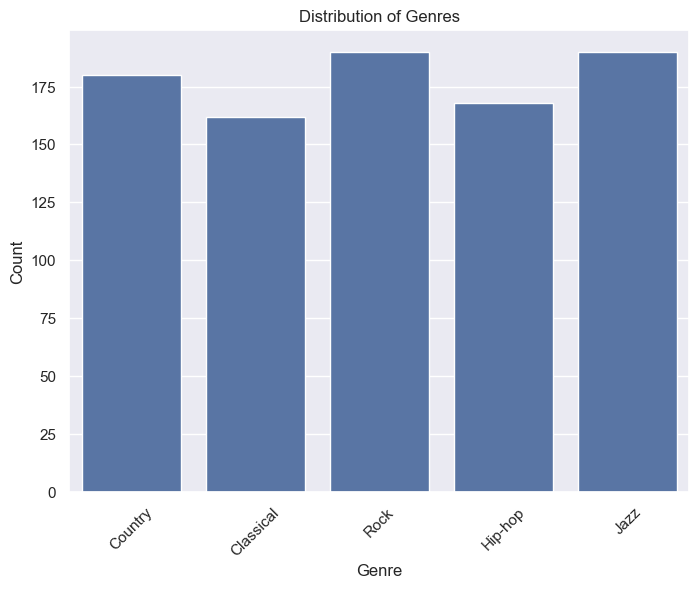

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(x='Genre', data=copy)
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



# Correlation Analysis

In [6]:
clean = copy.dropna(inplace=False)
clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        890 non-null    float64
 1   Dynamics Range               890 non-null    float64
 2   Vocal Presence               890 non-null    float64
 3   Percussion Strength          890 non-null    float64
 4   String Instrument Detection  890 non-null    float64
 5   Electronic Element Presence  890 non-null    float64
 6   Rhythm Complexity            890 non-null    float64
 7   Drums Influence              890 non-null    float64
 8   Distorted Guitar             890 non-null    float64
 9   Metal Frequencies            890 non-null    float64
 10  Ambient Sound Influence      890 non-null    float64
 11  Instrumental Overlaps        890 non-null    float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), object(1)

In [7]:
X = clean.drop('Genre', axis=1)
y = clean['Genre']


In [8]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [9]:
# making copy of cleaned dataset and fixing y_encoded to Genre column
clean_copy = clean.copy()
clean_copy.drop(columns=['Genre'], inplace = False)
clean_copy['Genre'] = y_encoded
clean_copy.info()



<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        890 non-null    float64
 1   Dynamics Range               890 non-null    float64
 2   Vocal Presence               890 non-null    float64
 3   Percussion Strength          890 non-null    float64
 4   String Instrument Detection  890 non-null    float64
 5   Electronic Element Presence  890 non-null    float64
 6   Rhythm Complexity            890 non-null    float64
 7   Drums Influence              890 non-null    float64
 8   Distorted Guitar             890 non-null    float64
 9   Metal Frequencies            890 non-null    float64
 10  Ambient Sound Influence      890 non-null    float64
 11  Instrumental Overlaps        890 non-null    float64
 12  Genre                        890 non-null    int32  
dtypes: float64(12), int32(1)


In [10]:
corr = clean_copy.corr()

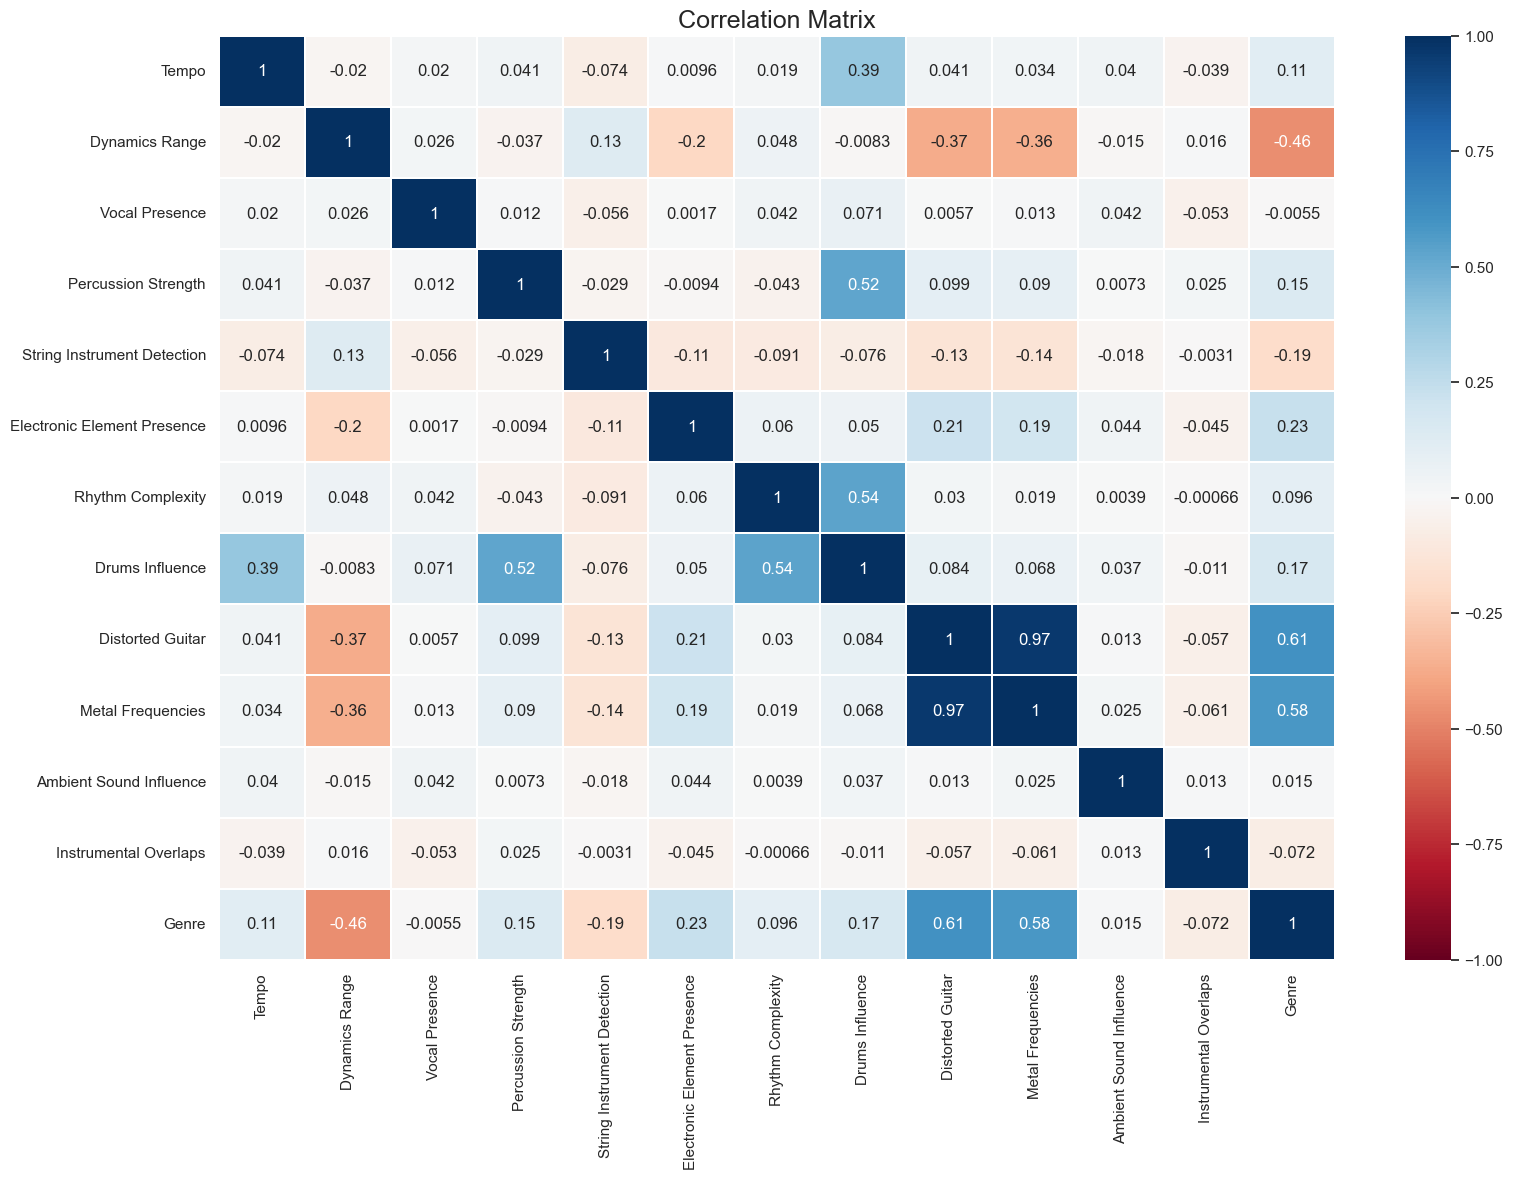

In [11]:
plt.figure(figsize=(18,12))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='RdBu', linewidths=0.1)
plt.title('Correlation Matrix', fontsize=18)
plt.yticks(rotation=0)
plt.show()

# PCA for Dimentionality Reduction



In [12]:
st = StandardScaler()
X_st = st.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_st)



In [13]:
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.20063071, 0.15062807, 0.09369199, 0.08696907, 0.08536054,
       0.08167379, 0.07948271, 0.07613474, 0.07000221, 0.05996203,
       0.01267309, 0.00279105])

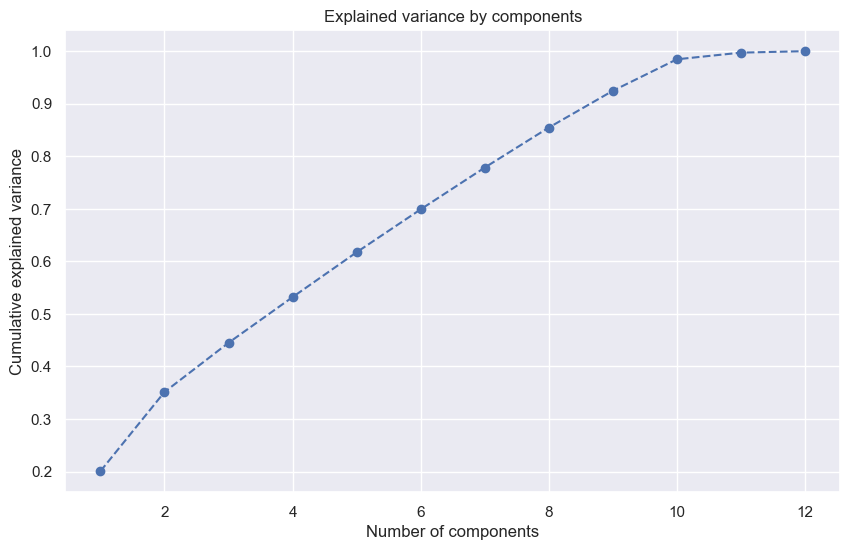

In [14]:
# Cumulative variance - the variance captured up untill a certain component
plt.figure(figsize=(10,6))
plt.plot(range(1,13),explained_variance.cumsum(),marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()



In [15]:
# Given the PCA results, we can use the first eight principal components
pca = PCA(n_components=8) 
X_pca = pca.fit_transform(X_st)

# Evaluating Classification Efficacy: PCA-Transformed vs. Original Data

## Logistic Regression with PCs

In [16]:
X_train, X_test , y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.3, random_state=42)


In [17]:
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [18]:
y_pred = classifier.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f' \n REPORT : \n {classification_report(y_test, y_pred, target_names=le.classes_)}')



accuracy: 0.5355805243445693
 
 REPORT : 
               precision    recall  f1-score   support

   Classical       0.89      0.98      0.93        51
     Country       0.32      0.23      0.27        52
     Hip-hop       0.49      0.44      0.46        48
        Jazz       0.41      0.42      0.42        62
        Rock       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



## Logistic Regression with Original Features

In [19]:
# Split the original (non-PCA) data into training and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_st, y_encoded, test_size=0.3, random_state=42)

In [20]:
# Train a Logistic Regression model using original features
logreg_orig = LogisticRegression(max_iter=10000)
logreg_orig.fit(X_train_orig, y_train_orig)

LogisticRegression(max_iter=10000)

In [21]:
# Predict and evaluate the model with original features
y_pred_orig = logreg_orig.predict(X_test_orig)
print("Accuracy with Original Features:", accuracy_score(y_test_orig, y_pred_orig))
print("\nClassification Report with Original Features:\n", classification_report(y_test_orig, y_pred_orig, target_names=le.classes_))

Accuracy with Original Features: 0.5318352059925093

Classification Report with Original Features:
               precision    recall  f1-score   support

   Classical       0.86      1.00      0.93        51
     Country       0.33      0.25      0.29        52
     Hip-hop       0.45      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267



# Genre Prediction and Integration

In [22]:
null_copy = copy[copy['Genre'].isnull()].copy()
null_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 13 to 995
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        110 non-null    float64
 1   Dynamics Range               110 non-null    float64
 2   Vocal Presence               110 non-null    float64
 3   Percussion Strength          110 non-null    float64
 4   String Instrument Detection  110 non-null    float64
 5   Electronic Element Presence  110 non-null    float64
 6   Rhythm Complexity            110 non-null    float64
 7   Drums Influence              110 non-null    float64
 8   Distorted Guitar             110 non-null    float64
 9   Metal Frequencies            110 non-null    float64
 10  Ambient Sound Influence      110 non-null    float64
 11  Instrumental Overlaps        110 non-null    float64
 12  Genre                        0 non-null      object 
dtypes: float64(12), object(1

In [23]:
# Feature 
null_feature = null_copy.drop(columns=['Genre'])
null_feature_scale = st.transform(null_feature)
null_feature_pca = pca.transform(null_feature_scale)
y_null_pred = classifier.predict(null_feature_pca)

In [24]:
null_copy.loc[:, 'Predicted_Genre'] = le.inverse_transform(y_null_pred)
null_copy['Predicted_Genre']

13     Classical
18       Country
22       Country
31          Rock
42          Rock
         ...    
991      Hip-hop
992         Rock
993      Hip-hop
994      Hip-hop
995    Classical
Name: Predicted_Genre, Length: 110, dtype: object

In [25]:
null_copy

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre,Predicted_Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN,Classical
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN,Country
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN,Country
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN,Rock
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN,Hip-hop
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN,Rock
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN,Hip-hop
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN,Hip-hop
